<a href="https://colab.research.google.com/github/L1KASA/Computational-Linguistics-NLP/blob/main/lab1/lab_1_6409_%D0%A2%D0%B0%D1%85%D0%BC%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%90%D0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

**Требования:**
* Python >= 3.X

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_1_6407_010302D_ИвановИИ.ipynb**.

In [1]:
#!pip install nltk inflect
# Код загрузки данных
# Если хотите добавить какие-либо библиотеки
# добавляйте их ИМЕННО ЗДЕСЬ
import nltk
import re
import inflect
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter
import random



nltk.download('gutenberg', quiet=True)
nltk.download('punkt', quiet=True)

# Наименования книг
books = []
# Содержимое книг
raw_texts = []

for fileid in nltk.corpus.gutenberg.fileids():
    books.append(fileid)
    raw_texts.append(nltk.corpus.gutenberg.raw(fileid))

#### Шаг №1
Предобработайте тексты, которые содержатся в списке `raw_texts`, но сначала внимательно изучите их структуру. Сохраните полученные данные в списке `books_tokens` (в разрезе книг, как и было с сырыми текстами).

Порядок обработки текста:
* Замените все числа, которые представлены цифрами, их текстовым представлением (т.е. прописью). Пример: 1 = one, 23 = twenty three, 1042 = one thousand forty two, и т.п. См. библиотеку **inflect**.
* Приведите текст к нижнему регистру
* Произведите токинезацию, в качестве токенов выступают слова.

Подсказка: рекомендуется отлаживать алгоритмы на паре книг, рассчеты на всем корпусе идут продолжительное время.

In [2]:
# Инициализация инструмента для преобразования чисел в текст
p = inflect.engine()

# Функция для предобработки текста
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()
    # Заменяем числа на их текстовое представление
    text = re.sub(r'\b\d+\b', lambda x: p.number_to_words(x.group()), text)
    # Удаляем знаки препинания
    text = re.sub(r'[\W_]', ' ', text)
    # Токенизируем текст
    tokens = nltk.word_tokenize(text)
    return tokens

# Предобработка всех текстов книг
books_tokens = []
for text in raw_texts:
    tokens = preprocess_text(text)
    books_tokens.append(tokens)

print(books_tokens[0][0:30])
# Вывод данных о books_tokens
#for i, book_tokens in enumerate(books_tokens):
#    print(f"Книга {books[i]}:")
#    print(book_tokens[:50])  # Выводим только первые 50 токенов для краткости
#    print("Всего токенов:", len(book_tokens))
#    print("=" * 50)

['emma', 'by', 'jane', 'austen', 'one', 'thousand', 'eight', 'hundred', 'and', 'sixteen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite']


#### Шаг №2

* Вычислите словари для каждой книги (переменная `books_vocabularies`).
* Вычислите словарь для всего корпуса (переменная `books_vocabulary`).
* Рассчитайте частоту употребления токенов в корпусе (переменная `freq_tokens`), и постройте график зависимости частоты употребления токена от токена (для 30-ти самых популярных).

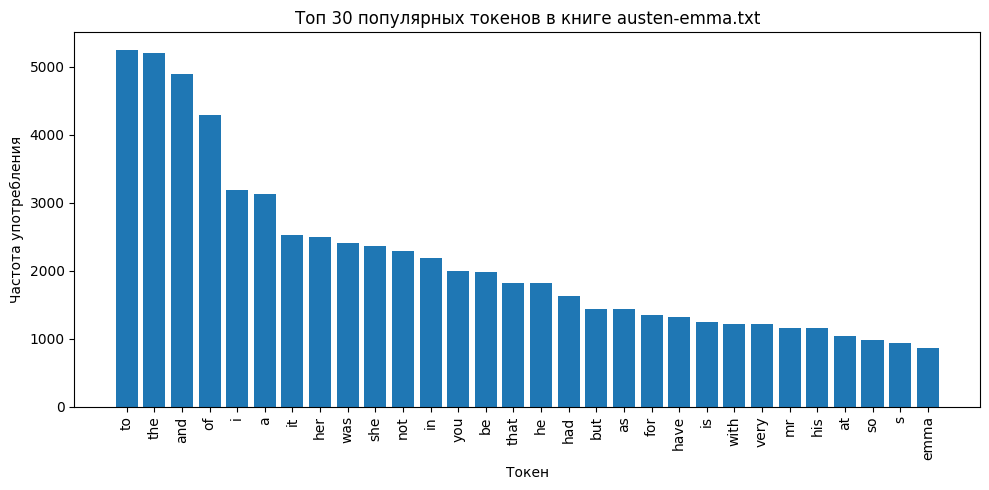

In [26]:
# Вычисление словарей для каждой книги
books_vocabularies = [FreqDist(book_tokens) for book_tokens in books_tokens]

# Вычисление словаря для всего корпуса
all_tokens = []
for book_tokens in books_tokens:
    for token in book_tokens:
        all_tokens.append(token)
books_vocabulary = FreqDist(all_tokens)

# Расчет частоты употребления токенов в корпусе
total_tokens = len(all_tokens)
freq_tokens = {token: freq / total_tokens for token, freq in books_vocabulary.items()}

# Функция для вывода топ 30 популярных токенов для заданной книги
def plot_top_tokens_for_book(book_index=None):
    if book_index is None:
        tokens = all_tokens
        title = '30 самых популярных токенов во всех книгах'
    else:
        tokens = books_tokens[book_index]
        title = f'Топ 30 популярных токенов в книге {books[book_index]}'
    fdist = FreqDist(tokens)
    most_common_tokens = fdist.most_common(30)

    # Разделение списка кортежей на два списка
    tokens, frequencies = zip(*most_common_tokens)

    plt.figure(figsize=(10, 5))
    plt.bar(tokens, frequencies)
    plt.xlabel('Токен')
    plt.ylabel('Частота употребления')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Введите номер книги или оставьте пустым для вывода для всех книг
plot_top_tokens_for_book(0)

#### Шаг №3
* Сгенерируйте список триграмм (переменная `trigrams`) по всему корпусу и рассчитайте частоту их употребления (переменная `freq_trigrams`).
* Реализуйте наивный генератор текста (30 токенов).
    1. Для затравки берется два стартовых токена, которые становятся текущими. Первый токен выводится на экран.
    2. Второй токен из активной пары токенов выводится на экран. Если мы сгененрировали нужное количество текста, то останавливаем алгоритм.
    3. По текущей паре токенов (первые в триграмме) определяется наиболее употребительная траграмма, которая помечается как использованная. Использованные триграммы на последующих шагах в рассмотрении не участвуют. Второй и третий токены данной триграммы становятся текущими. Переходим к п. 2.

Генерируем список триграмм по всему корпусу и рассчитываем частоту их употребления (присутствует реализация расчета для конкретной книги)

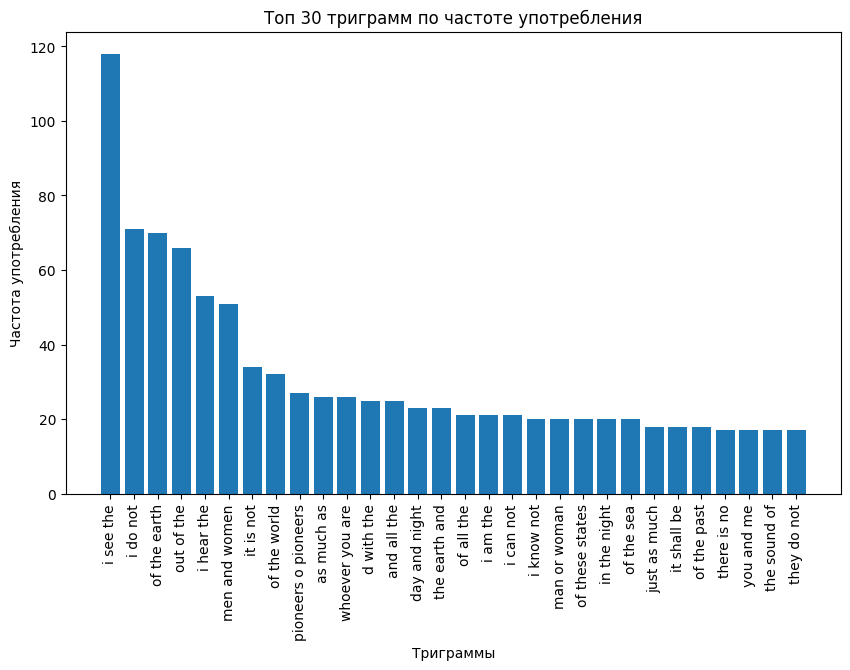

In [6]:
# По всему корпусу
trigrams = list(ngrams(book_tokens, 3))
# Рассчитываем частоту употребления триграмм
freq_trigrams = Counter(trigrams)

# Сортируем по частоте употребления
freq_trigrams = dict(sorted(freq_trigrams.items(), key=lambda item: item[1], reverse=True))

# Получаем топ 30 триграмм по частоте использования
top_trigrams = list(freq_trigrams.items())[:30]

# Получаем список токенов и их частоту
tokens, frequencies = zip(*[(t[0], t[1]) for t in top_trigrams])
# Преобразуем токены в строковый формат
tokens = [' '.join(trigram) for trigram in tokens]

# Создаем график
plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Триграммы')
plt.ylabel('Частота употребления')
plt.title('Топ 30 триграмм по частоте употребления')
plt.show()

In [24]:
# Инициализация результата
res = []

# Выбор случайной начальной триграммы
active_token = random.choice(list(freq_trigrams.items()))
print("Выбранная начальная триграмма:", active_token)

# Добавление первых двух токенов в результат
res.extend(active_token[0][:2])

# Пока не достигнем нужной длины текста
while len(res) < 30:
    # Поиск следующей триграммы, начинающейся с текущих токенов
    for trigram, count in freq_trigrams.items():
        if trigram[:2] == active_token[0][1:]:
            active_token = (trigram, count)
            print(active_token)
            break
    res.append(active_token[0][2])

# Вывод сгенерированного текста
print(' '.join(res))

Выбранная начальная триграмма: (('itself', 'grandly', 'as'), 1)
(('grandly', 'as', 'it'), 1)
(('as', 'it', 'is'), 4)
(('it', 'is', 'not'), 34)
(('is', 'not', 'the'), 8)
(('not', 'the', 'living'), 2)
(('the', 'living', 'and'), 4)
(('living', 'and', 'buried'), 1)
(('and', 'buried', 'speech'), 1)
(('buried', 'speech', 'is'), 1)
(('speech', 'is', 'always'), 1)
(('is', 'always', 'beautiful'), 3)
(('always', 'beautiful', 'the'), 2)
(('beautiful', 'the', 'wildest'), 1)
(('the', 'wildest', 'largest'), 1)
(('wildest', 'largest', 'passions'), 1)
(('largest', 'passions', 'bliss'), 1)
(('passions', 'bliss', 'that'), 1)
(('bliss', 'that', 'is'), 1)
(('that', 'is', 'the'), 7)
(('is', 'the', 'meaning'), 2)
(('the', 'meaning', 'of'), 3)
(('meaning', 'of', 'poems'), 1)
(('of', 'poems', 'the'), 5)
(('poems', 'the', 'answerer'), 3)
(('the', 'answerer', 'the'), 2)
(('answerer', 'the', 'builder'), 1)
(('the', 'builder', 'geometer'), 1)
(('builder', 'geometer', 'chemist'), 1)
itself grandly it is not the li